In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment1/'
FOLDERNAME = 'Colab Notebooks/assignment1_colab/assignment1/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# This downloads the CIFAR-10 dataset to your Drive
# if it doesn't already exist.
%cd /content/drive/My\ Drive/$FOLDERNAME/cs231n/datasets/
!bash get_datasets.sh
%cd /content/drive/My\ Drive/$FOLDERNAME

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/assignment1_colab/assignment1/cs231n/datasets
/content/drive/My Drive/Colab Notebooks/assignment1_colab/assignment1


# Fully-Connected Neural Nets
In this exercise we will implement fully-connected networks using a modular approach. For each layer we will implement a `forward` and a `backward` function. The `forward` function will receive inputs, weights, and other parameters and will return both an output and a `cache` object storing data needed for the backward pass, like this:

```python
def layer_forward(x, w):
  """ Receive inputs x and weights w """
  if x.ndim > 2:
    N = x.shape[0]
    x_reshaped = x.reshape(N, -1)  # 将多维输入展平为2D
  else:
    x_reshaped = x
    N = x.shape[0]
  # Do some computations ...
  z = x_reshaped.dot(w)  # 矩阵乘法
  if b is not None:
    z += b  # 添加偏置# ... some intermediate value
  # Do some more computations ...
  if activation == 'relu':
    out = np.maximum(0, z)  # ReLU激活
  elif activation == 'sigmoid':
    out = 1.0 / (1.0 + np.exp(-z))  # Sigmoid激活
# ... 其他激活函数# the output
   
  cache = (x, w, z, out) # Values we need to compute gradients
   
  return out, cache
```

The backward pass will receive upstream derivatives and the `cache` object, and will return gradients with respect to the inputs and weights, like this:

```python
def layer_backward(dout, cache):
  """
  Receive dout (derivative of loss with respect to outputs) and cache,
  and compute derivative with respect to inputs.
  """
  # Unpack cache values
  x, w, z, out = cache
  
  # Use values in cache to compute derivatives
  dx = x.T.dot(dout)# Derivative of loss with respect to x
  dw = dout.dot(w.T)# Derivative of loss with respect to w
  
  return dx, dw
```

After implementing a bunch of layers this way, we will be able to easily combine them to build classifiers with different architectures.
  

In [ ]:
# As usual, a bit of setup
from __future__ import print_function
import time
import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifiers.fc_net import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from cs231n.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

ModuleNotFoundError: No module named 'imp'

In [ ]:
# Load the (preprocessed) CIFAR10 data.

data = get_CIFAR10_data()
for k, v in list(data.items()):
  print(('%s: ' % k, v.shape))

('X_train: ', (49000, 3, 32, 32))
('y_train: ', (49000,))
('X_val: ', (1000, 3, 32, 32))
('y_val: ', (1000,))
('X_test: ', (1000, 3, 32, 32))
('y_test: ', (1000,))


# Affine layer: forward
Open the file `cs231n/layers.py` and implement the `affine_forward` function.

Once you are done you can test your implementaion by running the following:

In [ ]:

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

def affine_forward(x, w, b):
    """
    Computes the forward pass for an affine (fully-connected) layer.

    The input x has shape (N, d_1, ..., d_k) and contains a minibatch of N
    examples, where each example x[i] has shape (d_1, ..., d_k). We will
    reshape each input into a vector of dimension D = d_1 * ... * d_k, and
    then transform it to an output vector of dimension M.

    Inputs:
    - x: A numpy array containing input data, of shape (N, d_1, ..., d_k)
    - w: A numpy array of weights, of shape (D, M)
    - b: A numpy array of biases, of shape (M,)

    Returns a tuple of:
    - out: output, of shape (N, M)
    - cache: (x, w, b)
    """
    out = None
    ###########################################################################
    # TODO: Implement the affine forward pass. Store the result in out. You   #
    # will need to reshape the input into rows.                               #
    ###########################################################################
    N = x.shape[0]#输出x的第一维数量，即样本数量，x正常是四维数量、图像长、宽、RGB等
    x_reshaped = x.reshape(N, -1)#变成2维度，即第一个为样本数量，后边相乘
    out = np.dot(x_reshaped, w) + b
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    cache = (x, w, b)
    return out, cache
num_inputs = 2
input_shape = (4, 5, 6)
output_dim = 3

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)

x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)
w = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim)
b = np.linspace(-0.3, 0.1, num=output_dim)

out, _ = affine_forward(x, w, b)
correct_out = np.array([[ 1.49834967,  1.70660132,  1.91485297],
                        [ 3.25553199,  3.5141327,   3.77273342]])

# Compare your output with ours. The error should be around e-9 or less.
print('Testing affine_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing affine_forward function:
difference:  9.769849468192957e-10


# Affine layer: backward
Now implement the `affine_backward` function and test your implementation using numeric gradient checking.

In [ ]:
# Test the affine_backward function

def affine_backward(dout, cache):
    """
    Computes the backward pass for an affine layer.

    Inputs:
    - dout: Upstream derivative, of shape (N, M)
    - cache: Tuple of:
      - x: Input data, of shape (N, d_1, ... d_k)
      - w: Weights, of shape (D, M)
      - b: Biases, of shape (M,)

    Returns a tuple of:
    - dx: Gradient with respect to x, of shape (N, d1, ..., d_k)
    - dw: Gradient with respect to w, of shape (D, M)
    - db: Gradient with respect to b, of shape (M,)
    """
    x, w, b = cache
    dx, dw, db = None, None, None
    ###########################################################################
    # TODO: Implement the affine backward pass.                               #
    ###########################################################################
    N = x.shape[0]
    x_reshaped = x.reshape(N, -1)
    db = np.sum(dout, axis=0)
    dw = np.dot(x_reshaped.T, dout)
    dx_reshaped = np.dot(dout, w.T)
    dx = dx_reshaped.reshape(x.shape)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return dx, dw, db

np.random.seed(231)
x = np.random.randn(10, 2, 3)
w = np.random.randn(6, 5)
b = np.random.randn(5)
dout = np.random.randn(10, 5)

dx_num = eval_numerical_gradient_array(lambda x: affine_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_forward(x, w, b)[0], b, dout)

_, cache = affine_forward(x, w, b)
dx, dw, db = affine_backward(dout, cache)

# The error should be around e-10 or less
print('Testing affine_backward function:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing affine_backward function:
dx error:  5.399100368651805e-11
dw error:  9.904211865398145e-11
db error:  2.4122867568119087e-11


# ReLU activation: forward
Implement the forward pass for the ReLU activation function in the `relu_forward` function and test your implementation using the following:

In [ ]:
# Test the relu_forward function
def relu_forward(x):
    """
    Computes the forward pass for a layer of rectified linear units (ReLUs).

    Input:
    - x: Inputs, of any shape

    Returns a tuple of:
    - out: Output, of the same shape as x
    - cache: x
    """
    out = None
    ###########################################################################
    # TODO: Implement the ReLU forward pass.                                  #
    ###########################################################################
    out = np.maximum(0, x)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    cache = x
    return out, cache

x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)

out, _ = relu_forward(x)
correct_out = np.array([[ 0.,          0.,          0.,          0.,        ],
                        [ 0.,          0.,          0.04545455,  0.13636364,],
                        [ 0.22727273,  0.31818182,  0.40909091,  0.5,       ]])

# Compare your output with ours. The error should be on the order of e-8
print('Testing relu_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing relu_forward function:
difference:  4.999999798022158e-08


# ReLU activation: backward
Now implement the backward pass for the ReLU activation function in the `relu_backward` function and test your implementation using numeric gradient checking:

In [ ]:

def relu_backward(dout, cache):
    """
    Computes the backward pass for a layer of rectified linear units (ReLUs).

    Input:
    - dout: Upstream derivatives, of any shape
    - cache: Input x, of same shape as dout

    Returns:
    - dx: Gradient with respect to x
    """
    dx, x = None, cache
    ###########################################################################
    # TODO: Implement the ReLU backward pass.                                 #
    ###########################################################################
    dx = dout * (x > 0)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return dx
np.random.seed(231)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: relu_forward(x)[0], x, dout)

_, cache = relu_forward(x)
dx = relu_backward(dout, cache)

# The error should be on the order of e-12
print('Testing relu_backward function:')
print('dx error: ', rel_error(dx_num, dx))

Testing relu_backward function:
dx error:  3.2756349136310288e-12


## Inline Question 1:

We've only asked you to implement ReLU, but there are a number of different activation functions that one could use in neural networks, each with its pros and cons. In particular, an issue commonly seen with activation functions is getting zero (or close to zero) gradient flow during backpropagation. Which of the following activation functions have this problem? If you consider these functions in the one dimensional case, what types of input would lead to this behaviour?
1. Sigmoid
2. ReLU
3. Leaky ReLU

$\color{blue}{\textit Your Answer:}$ *Fill this in*




# "Sandwich" layers
There are some common patterns of layers that are frequently used in neural nets. For example, affine layers are frequently followed by a ReLU nonlinearity. To make these common patterns easy, we define several convenience layers in the file `cs231n/layer_utils.py`.

For now take a look at the `affine_relu_forward` and `affine_relu_backward` functions, and run the following to numerically gradient check the backward pass:

In [ ]:
#from cs231n.layer_utils import affine_relu_forward, affine_relu_backward
def affine_relu_forward(x, w, b):
    """
    Convenience layer that perorms an affine transform followed by a ReLU

    Inputs:
    - x: Input to the affine layer
    - w, b: Weights for the affine layer

    Returns a tuple of:
    - out: Output from the ReLU
    - cache: Object to give to the backward pass
    """
    a, fc_cache = affine_forward(x, w, b)
    out, relu_cache = relu_forward(a)
    cache = (fc_cache, relu_cache)
    return out, cache

def affine_relu_backward(dout, cache):
    """
    Backward pass for the affine-relu convenience layer
    """
    fc_cache, relu_cache = cache
    da = relu_backward(dout, relu_cache)
    dx, dw, db = affine_backward(da, fc_cache)
    return dx, dw, db
np.random.seed(231)
x = np.random.randn(2, 3, 4)
w = np.random.randn(12, 10)
b = np.random.randn(10)
dout = np.random.randn(2, 10)

out, cache = affine_relu_forward(x, w, b)
dx, dw, db = affine_relu_backward(dout, cache)

dx_num = eval_numerical_gradient_array(lambda x: affine_relu_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_relu_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_relu_forward(x, w, b)[0], b, dout)

# Relative error should be around e-10 or less
print('Testing affine_relu_forward and affine_relu_backward:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing affine_relu_forward and affine_relu_backward:
dx error:  2.299579177309368e-11
dw error:  8.162011105764925e-11
db error:  7.826724021458994e-12


# Loss layers: Softmax
Now implement the loss and gradient for softmax in the `softmax_loss` function in `cs231n/layers.py`. These should be similar to what you implemented in `cs231n/classifiers/softmax.py`. Other loss functions (e.g. `svm_loss`) can also be implemented in a modular way, however, it is not required for this assignment.

You can make sure that the implementations are correct by running the following:

In [ ]:
def softmax_loss(x, y):
    """
    Computes the loss and gradient for softmax classification.

    Inputs:
    - x: Input data, of shape (N, C) where x[i, j] is the score for the jth
      class for the ith input.
    - y: Vector of labels, of shape (N,) where y[i] is the label for x[i] and
      0 <= y[i] < C

    Returns a tuple of:
    - loss: Scalar giving the loss
    - dx: Gradient of the loss with respect to x
    """
    loss, dx = None, None

    ###########################################################################
    # TODO: Copy over your solution from A1.
    ###########################################################################
    # Get number of samples
    N = x.shape[0]

    # Compute unnormalized log probabilities (subtract max for numerical stability)
    shifted_logits = x - np.max(x, axis=1, keepdims=True)
    exp_logits = np.exp(shifted_logits)

    # Compute probabilities
    probs = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

    # Compute loss (average over all samples)
    correct_logprobs = -np.log(probs[range(N), y])
    loss = np.sum(correct_logprobs) / N

    # Compute gradient
    dx = probs.copy()
    dx[range(N), y] -= 1
    dx /= N
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return loss, dx
np.random.seed(231)
num_classes, num_inputs = 10, 50
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)


dx_num = eval_numerical_gradient(lambda x: softmax_loss(x, y)[0], x, verbose=False)
loss, dx = softmax_loss(x, y)

# Test softmax_loss function. Loss should be close to 2.3 and dx error should be around e-8
print('\nTesting softmax_loss:')
print('loss: ', loss)
print('dx error: ', rel_error(dx_num, dx))


Testing softmax_loss:
loss:  2.3025458445007376
dx error:  8.234144091578429e-09


# Two-layer network
Open the file `cs231n/classifiers/fc_net.py` and complete the implementation of the `TwoLayerNet` class. Read through it to make sure you understand the API. You can run the cell below to test your implementation.

In [ ]:
from builtins import range
import numpy as np

# import numexpr as ne # ~~DELETE LINE~~


def affine_forward(x, w, b):
    """
    Computes the forward pass for an affine (fully-connected) layer.

    The input x has shape (N, d_1, ..., d_k) and contains a minibatch of N
    examples, where each example x[i] has shape (d_1, ..., d_k). We will
    reshape each input into a vector of dimension D = d_1 * ... * d_k, and
    then transform it to an output vector of dimension M.

    Inputs:
    - x: A numpy array containing input data, of shape (N, d_1, ..., d_k)
    - w: A numpy array of weights, of shape (D, M)
    - b: A numpy array of biases, of shape (M,)

    Returns a tuple of:
    - out: output, of shape (N, M)
    - cache: (x, w, b)
    """
    out = None
    ###########################################################################
    # TODO: Implement the affine forward pass. Store the result in out. You   #
    # will need to reshape the input into rows.                               #
    ###########################################################################
    N = x.shape[0]
    x_reshaped = x.reshape(N, -1)
    out = np.dot(x_reshaped, w) + b
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    cache = (x, w, b)
    return out, cache


def affine_backward(dout, cache):
    """
    Computes the backward pass for an affine layer.

    Inputs:
    - dout: Upstream derivative, of shape (N, M)
    - cache: Tuple of:
      - x: Input data, of shape (N, d_1, ... d_k)
      - w: Weights, of shape (D, M)
      - b: Biases, of shape (M,)

    Returns a tuple of:
    - dx: Gradient with respect to x, of shape (N, d1, ..., d_k)
    - dw: Gradient with respect to w, of shape (D, M)
    - db: Gradient with respect to b, of shape (M,)
    """
    x, w, b = cache
    dx, dw, db = None, None, None
    ###########################################################################
    # TODO: Implement the affine backward pass.                               #
    ###########################################################################
    N = x.shape[0]
    x_reshaped = x.reshape(N, -1)
    db = np.sum(dout, axis=0)
    dw = np.dot(x_reshaped.T, dout)
    dx_reshaped = np.dot(dout, w.T)
    dx = dx_reshaped.reshape(x.shape)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return dx, dw, db


def relu_forward(x):
    """
    Computes the forward pass for a layer of rectified linear units (ReLUs).

    Input:
    - x: Inputs, of any shape

    Returns a tuple of:
    - out: Output, of the same shape as x
    - cache: x
    """
    out = None
    ###########################################################################
    # TODO: Implement the ReLU forward pass.                                  #
    ###########################################################################
    out = np.maximum(0, x)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    cache = x
    return out, cache


def relu_backward(dout, cache):
    """
    Computes the backward pass for a layer of rectified linear units (ReLUs).

    Input:
    - dout: Upstream derivatives, of any shape
    - cache: Input x, of same shape as dout

    Returns:
    - dx: Gradient with respect to x
    """
    dx, x = None, cache
    ###########################################################################
    # TODO: Implement the ReLU backward pass.                                 #
    ###########################################################################
    dx = dout * (x > 0)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return dx


def batchnorm_forward(x, gamma, beta, bn_param):
    """
    Forward pass for batch normalization.

    During training the sample mean and (uncorrected) sample variance are
    computed from minibatch statistics and used to normalize the incoming data.
    During training we also keep an exponentially decaying running mean of the
    mean and variance of each feature, and these averages are used to normalize
    data at test-time.

    At each timestep we update the running averages for mean and variance using
    an exponential decay based on the momentum parameter:

    running_mean = momentum * running_mean + (1 - momentum) * sample_mean
    running_var = momentum * running_var + (1 - momentum) * sample_var

    Note that the batch normalization paper suggests a different test-time
    behavior: they compute sample mean and variance for each feature using a
    large number of training images rather than using a running average. For
    this implementation we have chosen to use running averages instead since
    they do not require an additional estimation step; the torch7
    implementation of batch normalization also uses running averages.

    Input:
    - x: Data of shape (N, D)
    - gamma: Scale parameter of shape (D,)
    - beta: Shift paremeter of shape (D,)
    - bn_param: Dictionary with the following keys:
      - mode: 'train' or 'test'; required
      - eps: Constant for numeric stability
      - momentum: Constant for running mean / variance.
      - running_mean: Array of shape (D,) giving running mean of features
      - running_var Array of shape (D,) giving running variance of features

    Returns a tuple of:
    - out: of shape (N, D)
    - cache: A tuple of values needed in the backward pass
    """
    mode = bn_param["mode"]
    eps = bn_param.get("eps", 1e-5)
    momentum = bn_param.get("momentum", 0.9)

    N, D = x.shape
    running_mean = bn_param.get("running_mean", np.zeros(D, dtype=x.dtype))
    running_var = bn_param.get("running_var", np.zeros(D, dtype=x.dtype))

    out, cache = None, None
    if mode == "train":
        #######################################################################
        # TODO: Implement the training-time forward pass for batch norm.      #
        # Use minibatch statistics to compute the mean and variance, use      #
        # these statistics to normalize the incoming data, and scale and      #
        # shift the normalized data using gamma and beta.                     #
        #                                                                     #
        # You should store the output in the variable out. Any intermediates  #
        # that you need for the backward pass should be stored in the cache   #
        # variable.                                                           #
        #                                                                     #
        # You should also use your computed sample mean and variance together #
        # with the momentum variable to update the running mean and running   #
        # variance, storing your result in the running_mean and running_var   #
        # variables.                                                          #
        #                                                                     #
        # Note that though you should be keeping track of the running         #
        # variance, you should normalize the data based on the standard       #
        # deviation (square root of variance) instead!                        #
        # Referencing the original paper (https://arxiv.org/abs/1502.03167)   #
        # might prove to be helpful.                                          #
        #######################################################################
        pass
        #######################################################################
        #                           END OF YOUR CODE                          #
        #######################################################################
    elif mode == "test":
        #######################################################################
        # TODO: Implement the test-time forward pass for batch normalization. #
        # Use the running mean and variance to normalize the incoming data,   #
        # then scale and shift the normalized data using gamma and beta.      #
        # Store the result in the out variable.                               #
        #######################################################################
        pass
        #######################################################################
        #                          END OF YOUR CODE                           #
        #######################################################################
    else:
        raise ValueError('Invalid forward batchnorm mode "%s"' % mode)

    # Store the updated running means back into bn_param
    bn_param["running_mean"] = running_mean
    bn_param["running_var"] = running_var

    return out, cache


def batchnorm_backward(dout, cache):
    """
    Backward pass for batch normalization.

    For this implementation, you should write out a computation graph for
    batch normalization on paper and propagate gradients backward through
    intermediate nodes.

    Inputs:
    - dout: Upstream derivatives, of shape (N, D)
    - cache: Variable of intermediates from batchnorm_forward.

    Returns a tuple of:
    - dx: Gradient with respect to inputs x, of shape (N, D)
    - dgamma: Gradient with respect to scale parameter gamma, of shape (D,)
    - dbeta: Gradient with respect to shift parameter beta, of shape (D,)
    """
    dx, dgamma, dbeta = None, None, None
    ###########################################################################
    # TODO: Implement the backward pass for batch normalization. Store the    #
    # results in the dx, dgamma, and dbeta variables.                         #
    # Referencing the original paper (https://arxiv.org/abs/1502.03167)       #
    # might prove to be helpful.                                              #
    ###########################################################################

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################

    return dx, dgamma, dbeta


def batchnorm_backward_alt(dout, cache):
    """
    Alternative backward pass for batch normalization.

    For this implementation you should work out the derivatives for the batch
    normalizaton backward pass on paper and simplify as much as possible. You
    should be able to derive a simple expression for the backward pass.
    See the jupyter notebook for more hints.

    Note: This implementation should expect to receive the same cache variable
    as batchnorm_backward, but might not use all of the values in the cache.

    Inputs / outputs: Same as batchnorm_backward
    """
    dx, dgamma, dbeta = None, None, None
    ###########################################################################
    # TODO: Implement the backward pass for batch normalization. Store the    #
    # results in the dx, dgamma, and dbeta variables.                         #
    #                                                                         #
    # After computing the gradient with respect to the centered inputs, you   #
    # should be able to compute gradients with respect to the inputs in a     #
    # single statement; our implementation fits on a single 80-character line.#
    ###########################################################################

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################

    return dx, dgamma, dbeta


def layernorm_forward(x, gamma, beta, ln_param):
    """
    Forward pass for layer normalization.

    During both training and test-time, the incoming data is normalized per data-point,
    before being scaled by gamma and beta parameters identical to that of batch normalization.

    Note that in contrast to batch normalization, the behavior during train and test-time for
    layer normalization are identical, and we do not need to keep track of running averages
    of any sort.

    Input:
    - x: Data of shape (N, D)
    - gamma: Scale parameter of shape (D,)
    - beta: Shift paremeter of shape (D,)
    - ln_param: Dictionary with the following keys:
        - eps: Constant for numeric stability

    Returns a tuple of:
    - out: of shape (N, D)
    - cache: A tuple of values needed in the backward pass
    """
    out, cache = None, None
    eps = ln_param.get("eps", 1e-5)
    ###########################################################################
    # TODO: Implement the training-time forward pass for layer norm.          #
    # Normalize the incoming data, and scale and  shift the normalized data   #
    #  using gamma and beta.                                                  #
    # HINT: this can be done by slightly modifying your training-time         #
    # implementation of  batch normalization, and inserting a line or two of  #
    # well-placed code. In particular, can you think of any matrix            #
    # transformations you could perform, that would enable you to copy over   #
    # the batch norm code and leave it almost unchanged?                      #
    ###########################################################################

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return out, cache


def layernorm_backward(dout, cache):
    """
    Backward pass for layer normalization.

    For this implementation, you can heavily rely on the work you've done already
    for batch normalization.

    Inputs:
    - dout: Upstream derivatives, of shape (N, D)
    - cache: Variable of intermediates from layernorm_forward.

    Returns a tuple of:
    - dx: Gradient with respect to inputs x, of shape (N, D)
    - dgamma: Gradient with respect to scale parameter gamma, of shape (D,)
    - dbeta: Gradient with respect to shift parameter beta, of shape (D,)
    """
    dx, dgamma, dbeta = None, None, None
    ###########################################################################
    # TODO: Implement the backward pass for layer norm.                       #
    #                                                                         #
    # HINT: this can be done by slightly modifying your training-time         #
    # implementation of batch normalization. The hints to the forward pass    #
    # still apply!                                                            #
    ###########################################################################

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return dx, dgamma, dbeta


def dropout_forward(x, dropout_param):
    """
    Performs the forward pass for (inverted) dropout.

    Inputs:
    - x: Input data, of any shape
    - dropout_param: A dictionary with the following keys:
      - p: Dropout parameter. We keep each neuron output with probability p.
      - mode: 'test' or 'train'. If the mode is train, then perform dropout;
        if the mode is test, then just return the input.
      - seed: Seed for the random number generator. Passing seed makes this
        function deterministic, which is needed for gradient checking but not
        in real networks.

    Outputs:
    - out: Array of the same shape as x.
    - cache: tuple (dropout_param, mask). In training mode, mask is the dropout
      mask that was used to multiply the input; in test mode, mask is None.

    NOTE: Please implement **inverted** dropout, not the vanilla version of dropout.
    See http://cs231n.github.io/neural-networks-2/#reg for more details.

    NOTE 2: Keep in mind that p is the probability of **keep** a neuron
    output; this might be contrary to some sources, where it is referred to
    as the probability of dropping a neuron output.
    """
    p, mode = dropout_param["p"], dropout_param["mode"]
    if "seed" in dropout_param:
        np.random.seed(dropout_param["seed"])

    mask = None
    out = None

    if mode == "train":
        #######################################################################
        # TODO: Implement training phase forward pass for inverted dropout.   #
        # Store the dropout mask in the mask variable.                        #
        #######################################################################
        pass
        #######################################################################
        #                           END OF YOUR CODE                          #
        #######################################################################
    elif mode == "test":
        #######################################################################
        # TODO: Implement the test phase forward pass for inverted dropout.   #
        #######################################################################
        pass
        #######################################################################
        #                            END OF YOUR CODE                         #
        #######################################################################

    cache = (dropout_param, mask)
    out = out.astype(x.dtype, copy=False)

    return out, cache


def dropout_backward(dout, cache):
    """
    Perform the backward pass for (inverted) dropout.

    Inputs:
    - dout: Upstream derivatives, of any shape
    - cache: (dropout_param, mask) from dropout_forward.
    """
    dropout_param, mask = cache
    mode = dropout_param["mode"]

    dx = None
    if mode == "train":
        #######################################################################
        # TODO: Implement training phase backward pass for inverted dropout   #
        #######################################################################
        pass
        #######################################################################
        #                          END OF YOUR CODE                           #
        #######################################################################
    elif mode == "test":
        dx = dout
    return dx


def conv_forward_naive(x, w, b, conv_param):
    """
    A naive implementation of the forward pass for a convolutional layer.

    The input consists of N data points, each with C channels, height H and
    width W. We convolve each input with F different filters, where each filter
    spans all C channels and has height HH and width WW.

    Input:
    - x: Input data of shape (N, C, H, W)
    - w: Filter weights of shape (F, C, HH, WW)
    - b: Biases, of shape (F,)
    - conv_param: A dictionary with the following keys:
      - 'stride': The number of pixels between adjacent receptive fields in the
        horizontal and vertical directions.
      - 'pad': The number of pixels that will be used to zero-pad the input.


    During padding, 'pad' zeros should be placed symmetrically (i.e equally on both sides)
    along the height and width axes of the input. Be careful not to modfiy the original
    input x directly.

    Returns a tuple of:
    - out: Output data, of shape (N, F, H', W') where H' and W' are given by
      H' = 1 + (H + 2 * pad - HH) / stride
      W' = 1 + (W + 2 * pad - WW) / stride
    - cache: (x, w, b, conv_param)
    """
    out = None
    ###########################################################################
    # TODO: Implement the convolutional forward pass.                         #
    # Hint: you can use the function np.pad for padding.                      #
    ###########################################################################

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    cache = (x, w, b, conv_param)
    return out, cache


def conv_backward_naive(dout, cache):
    """
    A naive implementation of the backward pass for a convolutional layer.

    Inputs:
    - dout: Upstream derivatives.
    - cache: A tuple of (x, w, b, conv_param) as in conv_forward_naive

    Returns a tuple of:
    - dx: Gradient with respect to x
    - dw: Gradient with respect to w
    - db: Gradient with respect to b
    """
    dx, dw, db = None, None, None
    ###########################################################################
    # TODO: Implement the convolutional backward pass.                        #
    ###########################################################################

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return dx, dw, db


def max_pool_forward_naive(x, pool_param):
    """
    A naive implementation of the forward pass for a max-pooling layer.

    Inputs:
    - x: Input data, of shape (N, C, H, W)
    - pool_param: dictionary with the following keys:
      - 'pool_height': The height of each pooling region
      - 'pool_width': The width of each pooling region
      - 'stride': The distance between adjacent pooling regions

    No padding is necessary here, eg you can assume:
      - (H - pool_height) % stride == 0
      - (W - pool_width) % stride == 0

    Returns a tuple of:
    - out: Output data, of shape (N, C, H', W') where H' and W' are given by
      H' = 1 + (H - pool_height) / stride
      W' = 1 + (W - pool_width) / stride
    - cache: (x, pool_param)
    """
    out = None
    ###########################################################################
    # TODO: Implement the max-pooling forward pass                            #
    ###########################################################################

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    cache = (x, pool_param)
    return out, cache


def max_pool_backward_naive(dout, cache):
    """
    A naive implementation of the backward pass for a max-pooling layer.

    Inputs:
    - dout: Upstream derivatives
    - cache: A tuple of (x, pool_param) as in the forward pass.

    Returns:
    - dx: Gradient with respect to x
    """
    dx = None
    ###########################################################################
    # TODO: Implement the max-pooling backward pass                           #
    ###########################################################################

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return dx


def spatial_batchnorm_forward(x, gamma, beta, bn_param):
    """
    Computes the forward pass for spatial batch normalization.

    Inputs:
    - x: Input data of shape (N, C, H, W)
    - gamma: Scale parameter, of shape (C,)
    - beta: Shift parameter, of shape (C,)
    - bn_param: Dictionary with the following keys:
      - mode: 'train' or 'test'; required
      - eps: Constant for numeric stability
      - momentum: Constant for running mean / variance. momentum=0 means that
        old information is discarded completely at every time step, while
        momentum=1 means that new information is never incorporated. The
        default of momentum=0.9 should work well in most situations.
      - running_mean: Array of shape (D,) giving running mean of features
      - running_var Array of shape (D,) giving running variance of features

    Returns a tuple of:
    - out: Output data, of shape (N, C, H, W)
    - cache: Values needed for the backward pass
    """
    out, cache = None, None

    ###########################################################################
    # TODO: Implement the forward pass for spatial batch normalization.       #
    #                                                                         #
    # HINT: You can implement spatial batch normalization by calling the      #
    # vanilla version of batch normalization you implemented above.           #
    # Your implementation should be very short; ours is less than five lines. #
    ###########################################################################

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################

    return out, cache


def spatial_batchnorm_backward(dout, cache):
    """
    Computes the backward pass for spatial batch normalization.

    Inputs:
    - dout: Upstream derivatives, of shape (N, C, H, W)
    - cache: Values from the forward pass

    Returns a tuple of:
    - dx: Gradient with respect to inputs, of shape (N, C, H, W)
    - dgamma: Gradient with respect to scale parameter, of shape (C,)
    - dbeta: Gradient with respect to shift parameter, of shape (C,)
    """
    dx, dgamma, dbeta = None, None, None

    ###########################################################################
    # TODO: Implement the backward pass for spatial batch normalization.      #
    #                                                                         #
    # HINT: You can implement spatial batch normalization by calling the      #
    # vanilla version of batch normalization you implemented above.           #
    # Your implementation should be very short; ours is less than five lines. #
    ###########################################################################

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################

    return dx, dgamma, dbeta


def spatial_groupnorm_forward(x, gamma, beta, G, gn_param):
    """
    Computes the forward pass for spatial group normalization.
    In contrast to layer normalization, group normalization splits each entry
    in the data into G contiguous pieces, which it then normalizes independently.
    Per feature shifting and scaling are then applied to the data, in a manner identical to that of batch normalization and layer normalization.

    Inputs:
    - x: Input data of shape (N, C, H, W)
    - gamma: Scale parameter, of shape (1, C, 1, 1)
    - beta: Shift parameter, of shape (1, C, 1, 1)
    - G: Integer mumber of groups to split into, should be a divisor of C
    - gn_param: Dictionary with the following keys:
      - eps: Constant for numeric stability

    Returns a tuple of:
    - out: Output data, of shape (N, C, H, W)
    - cache: Values needed for the backward pass
    """
    out, cache = None, None
    eps = gn_param.get("eps", 1e-5)
    ###########################################################################
    # TODO: Implement the forward pass for spatial group normalization.       #
    # This will be extremely similar to the layer norm implementation.        #
    # In particular, think about how you could transform the matrix so that   #
    # the bulk of the code is similar to both train-time batch normalization  #
    # and layer normalization!                                                #
    ###########################################################################

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return out, cache


def spatial_groupnorm_backward(dout, cache):
    """
    Computes the backward pass for spatial group normalization.

    Inputs:
    - dout: Upstream derivatives, of shape (N, C, H, W)
    - cache: Values from the forward pass

    Returns a tuple of:
    - dx: Gradient with respect to inputs, of shape (N, C, H, W)
    - dgamma: Gradient with respect to scale parameter, of shape (1, C, 1, 1)
    - dbeta: Gradient with respect to shift parameter, of shape (1, C, 1, 1)
    """
    dx, dgamma, dbeta = None, None, None

    ###########################################################################
    # TODO: Implement the backward pass for spatial group normalization.      #
    # This will be extremely similar to the layer norm implementation.        #
    ###########################################################################

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return dx, dgamma, dbeta


def svm_loss(x, y):
    """
    Computes the loss and gradient using for multiclass SVM classification.

    Inputs:
    - x: Input data, of shape (N, C) where x[i, j] is the score for the jth
      class for the ith input.
    - y: Vector of labels, of shape (N,) where y[i] is the label for x[i] and
      0 <= y[i] < C

    Returns a tuple of:
    - loss: Scalar giving the loss
    - dx: Gradient of the loss with respect to x
    """
    loss, dx = None, None

    ###########################################################################
    # TODO: Copy over your solution from A1.
    ###########################################################################

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return loss, dx


def softmax_loss(x, y):
    """
    Computes the loss and gradient for softmax classification.

    Inputs:
    - x: Input data, of shape (N, C) where x[i, j] is the score for the jth
      class for the ith input.
    - y: Vector of labels, of shape (N,) where y[i] is the label for x[i] and
      0 <= y[i] < C

    Returns a tuple of:
    - loss: Scalar giving the loss
    - dx: Gradient of the loss with respect to x
    """
    loss, dx = None, None

    ###########################################################################
    # TODO: Copy over your solution from A1.
    ###########################################################################
    # Get number of samples
    N = x.shape[0]

    # Compute unnormalized log probabilities (subtract max for numerical stability)
    shifted_logits = x - np.max(x, axis=1, keepdims=True)
    exp_logits = np.exp(shifted_logits)

    # Compute probabilities
    probs = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

    # Compute loss (average over all samples)
    correct_logprobs = -np.log(probs[range(N), y])
    loss = np.sum(correct_logprobs) / N

    # Compute gradient
    dx = probs.copy()
    dx[range(N), y] -= 1
    dx /= N
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return loss, dx


In [ ]:

def affine_relu_forward(x, w, b):
    """
    Convenience layer that perorms an affine transform followed by a ReLU

    Inputs:
    - x: Input to the affine layer
    - w, b: Weights for the affine layer

    Returns a tuple of:
    - out: Output from the ReLU
    - cache: Object to give to the backward pass
    """
    a, fc_cache = affine_forward(x, w, b)
    out, relu_cache = relu_forward(a)
    cache = (fc_cache, relu_cache)
    return out, cache


def affine_relu_backward(dout, cache):
    """
    Backward pass for the affine-relu convenience layer
    """
    fc_cache, relu_cache = cache
    da = relu_backward(dout, relu_cache)
    dx, dw, db = affine_backward(da, fc_cache)
    return dx, dw, db

In [ ]:

from builtins import range
from builtins import object
import os
import numpy as np

class TwoLayerNet(object):
    """
    A two-layer fully-connected neural network with ReLU nonlinearity and
    softmax loss that uses a modular layer design. We assume an input dimension
    of D, a hidden dimension of H, and perform classification over C classes.

    The architecure should be affine - relu - affine - softmax.

    Note that this class does not implement gradient descent; instead, it
    will interact with a separate Solver object that is responsible for running
    optimization.

    The learnable parameters of the model are stored in the dictionary
    self.params that maps parameter names to numpy arrays.
    """

    def __init__(
        self,
        input_dim=3 * 32 * 32,
        hidden_dim=100,
        num_classes=10,
        weight_scale=1e-3,
        reg=0.0,
    ):
        """
        Initialize a new network.

        Inputs:
        - input_dim: An integer giving the size of the input
        - hidden_dim: An integer giving the size of the hidden layer
        - num_classes: An integer giving the number of classes to classify
        - weight_scale: Scalar giving the standard deviation for random
          initialization of the weights.
        - reg: Scalar giving L2 regularization strength.
        """
        self.params = {}
        self.reg = reg

        ############################################################################
        # TODO: Initialize the weights and biases of the two-layer net. Weights    #
        # should be initialized from a Gaussian centered at 0.0 with               #
        # standard deviation equal to weight_scale, and biases should be           #
        # initialized to zero. All weights and biases should be stored in the      #
        # dictionary self.params, with first layer weights                         #
        # and biases using the keys 'W1' and 'b1' and second layer                 #
        # weights and biases using the keys 'W2' and 'b2'.                         #
        ############################################################################
        self.params['W1'] = np.random.randn(input_dim, hidden_dim) * weight_scale
        self.params['b1'] = np.zeros(hidden_dim)
        self.params['W2'] = np.random.randn(hidden_dim, num_classes) * weight_scale
        self.params['b2'] = np.zeros(num_classes)
        ############################################################################
        #                             END OF YOUR CODE                             #
        ############################################################################
    def loss(self, X, y=None):
        """
        Compute loss and gradient for a minibatch of data.

        Inputs:
        - X: Array of input data of shape (N, d_1, ..., d_k)
        - y: Array of labels, of shape (N,). y[i] gives the label for X[i].

        Returns:
        If y is None, then run a test-time forward pass of the model and return:
        - scores: Array of shape (N, C) giving classification scores, where
          scores[i, c] is the classification score for X[i] and class c.

        If y is not None, then run a training-time forward and backward pass and
        return a tuple of:
        - loss: Scalar value giving the loss
        - grads: Dictionary with the same keys as self.params, mapping parameter
          names to gradients of the loss with respect to those parameters.
        """
        scores = None
        ############################################################################
        # TODO: Implement the forward pass for the two-layer net, computing the    #
        # class scores for X and storing them in the scores variable.              #
        ############################################################################
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']

        # Forward pass: affine -> relu -> affine
        out1, cache1 = affine_forward(X, W1, b1)
        out2, cache2 = relu_forward(out1)
        scores, cache3 = affine_forward(out2, W2, b2)
        ############################################################################
        #                             END OF YOUR CODE                             #
        ############################################################################

        # If y is None then we are in test mode so just return scores
        if y is None:
            return scores

        loss, grads = 0, {}
        ############################################################################
        # TODO: Implement the backward pass for the two-layer net. Store the loss  #
        # in the loss variable and gradients in the grads dictionary. Compute data #
        # loss using softmax, and make sure that grads[k] holds the gradients for  #
        # self.params[k]. Don't forget to add L2 regularization!                   #
        #                                                                          #
        # NOTE: To ensure that your implementation matches ours and you pass the   #
        # automated tests, make sure that your L2 regularization includes a factor #
        # of 0.5 to simplify the expression for the gradient.                      #
        ############################################################################
        # Compute softmax loss
        loss, dscores = softmax_loss(scores, y)

        # Add L2 regularization
        loss += 0.5 * self.reg * (np.sum(W1 * W1) + np.sum(W2 * W2))

        # Backward pass: affine -> relu -> affine
        dout2, dW2, db2 = affine_backward(dscores, cache3)
        dout1 = relu_backward(dout2, cache2)
        dX, dW1, db1 = affine_backward(dout1, cache1)

        # Add regularization to gradients
        dW1 += self.reg * W1
        dW2 += self.reg * W2

        # Store gradients
        grads['W1'] = dW1
        grads['b1'] = db1
        grads['W2'] = dW2
        grads['b2'] = db2
        ############################################################################
        #                             END OF YOUR CODE                             #
        ############################################################################

        return loss, grads
    def save(self, fname):
      """Save model parameters."""
      fpath = os.path.join(os.path.dirname(__file__), "../saved/", fname)
      params = self.params
      np.save(fpath, params)
      print(fname, "saved.")

    def load(self, fname):
      """Load model parameters."""
      fpath = os.path.join(os.path.dirname(__file__), "../saved/", fname)
      if not os.path.exists(fpath):
        print(fname, "not available.")
        return False
      else:
        params = np.load(fpath, allow_pickle=True).item()
        self.params = params
        print(fname, "loaded.")
        return True

In [ ]:

np.random.seed(231)
N, D, H, C = 3, 5, 50, 7
X = np.random.randn(N, D)
y = np.random.randint(C, size=N)

std = 1e-3
model = TwoLayerNet(input_dim=D, hidden_dim=H, num_classes=C, weight_scale=std)

print('Testing initialization ... ')
W1_std = abs(model.params['W1'].std() - std)
b1 = model.params['b1']
W2_std = abs(model.params['W2'].std() - std)
b2 = model.params['b2']
assert W1_std < std / 10, 'First layer weights do not seem right'
assert np.all(b1 == 0), 'First layer biases do not seem right'
assert W2_std < std / 10, 'Second layer weights do not seem right'
assert np.all(b2 == 0), 'Second layer biases do not seem right'

print('Testing test-time forward pass ... ')
model.params['W1'] = np.linspace(-0.7, 0.3, num=D*H).reshape(D, H)
model.params['b1'] = np.linspace(-0.1, 0.9, num=H)
model.params['W2'] = np.linspace(-0.3, 0.4, num=H*C).reshape(H, C)
model.params['b2'] = np.linspace(-0.9, 0.1, num=C)
X = np.linspace(-5.5, 4.5, num=N*D).reshape(D, N).T
scores = model.loss(X)
correct_scores = np.asarray(
  [[11.53165108,  12.2917344,   13.05181771,  13.81190102,  14.57198434, 15.33206765,  16.09215096],
   [12.05769098,  12.74614105,  13.43459113,  14.1230412,   14.81149128, 15.49994135,  16.18839143],
   [12.58373087,  13.20054771,  13.81736455,  14.43418138,  15.05099822, 15.66781506,  16.2846319 ]])
scores_diff = np.abs(scores - correct_scores).sum()
assert scores_diff < 1e-6, 'Problem with test-time forward pass'

print('Testing training loss (no regularization)')
y = np.asarray([0, 5, 1])
loss, grads = model.loss(X, y)
correct_loss = 3.4702243556
assert abs(loss - correct_loss) < 1e-10, 'Problem with training-time loss'

model.reg = 1.0
loss, grads = model.loss(X, y)
correct_loss = 26.5948426952
assert abs(loss - correct_loss) < 1e-10, 'Problem with regularization loss'

# Errors should be around e-7 or less
for reg in [0.0, 0.7]:
  print('Running numeric gradient check with reg = ', reg)
  model.reg = reg
  loss, grads = model.loss(X, y)

  for name in sorted(grads):
    f = lambda _: model.loss(X, y)[0]
    grad_num = eval_numerical_gradient(f, model.params[name], verbose=False)
    print('%s relative error: %.2e' % (name, rel_error(grad_num, grads[name])))

Testing initialization ... 
Testing test-time forward pass ... 
Testing training loss (no regularization)
Running numeric gradient check with reg =  0.0
W1 relative error: 1.83e-08
W2 relative error: 3.20e-10
b1 relative error: 9.83e-09
b2 relative error: 4.33e-10
Running numeric gradient check with reg =  0.7
W1 relative error: 2.53e-07
W2 relative error: 2.85e-08
b1 relative error: 1.56e-08
b2 relative error: 9.09e-10


# Solver
Open the file `cs231n/solver.py` and read through it to familiarize yourself with the API. After doing so, use a `Solver` instance to train a `TwoLayerNet` that achieves about `36%` accuracy on the validation set.

In [ ]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
model = TwoLayerNet(input_size, hidden_size, num_classes)
solver = None
##############################################################################
# TODO: Use a Solver instance to train a TwoLayerNet that achieves about 36% #
# accuracy on the validation set.                                            #
##############################################################################
solver = Solver(model, data,
                update_rule='sgd',
                optim_config={
                  'learning_rate': 1e-3,
                },
                lr_decay=0.95,
                num_epochs=10,
                batch_size=200,
                print_every=100,
                verbose=True)

# 开始训练
solver.train()
###################################################################
#                             END OF YOUR CODE                               #
##############################################################################
##############################################################################
# TODO: Use a Solver instance to train a TwoLayerNet that achieves about 36% #
# accuracy on the validation set.                                            #
##############################################################################

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

(Iteration 1 / 2450) loss: 2.301725
(Epoch 0 / 10) train acc: 0.187000; val_acc: 0.181000
(Iteration 101 / 2450) loss: 1.840451
(Iteration 201 / 2450) loss: 1.744794
(Epoch 1 / 10) train acc: 0.383000; val_acc: 0.418000
(Iteration 301 / 2450) loss: 1.529679
(Iteration 401 / 2450) loss: 1.543941
(Epoch 2 / 10) train acc: 0.444000; val_acc: 0.439000
(Iteration 501 / 2450) loss: 1.552313
(Iteration 601 / 2450) loss: 1.511572
(Iteration 701 / 2450) loss: 1.462240
(Epoch 3 / 10) train acc: 0.476000; val_acc: 0.444000
(Iteration 801 / 2450) loss: 1.515084
(Iteration 901 / 2450) loss: 1.462425
(Epoch 4 / 10) train acc: 0.495000; val_acc: 0.469000
(Iteration 1001 / 2450) loss: 1.376394
(Iteration 1101 / 2450) loss: 1.612014
(Iteration 1201 / 2450) loss: 1.612220
(Epoch 5 / 10) train acc: 0.509000; val_acc: 0.477000
(Iteration 1301 / 2450) loss: 1.427094
(Iteration 1401 / 2450) loss: 1.422479
(Epoch 6 / 10) train acc: 0.535000; val_acc: 0.480000
(Iteration 1501 / 2450) loss: 1.395185
(Iteration

# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.36 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

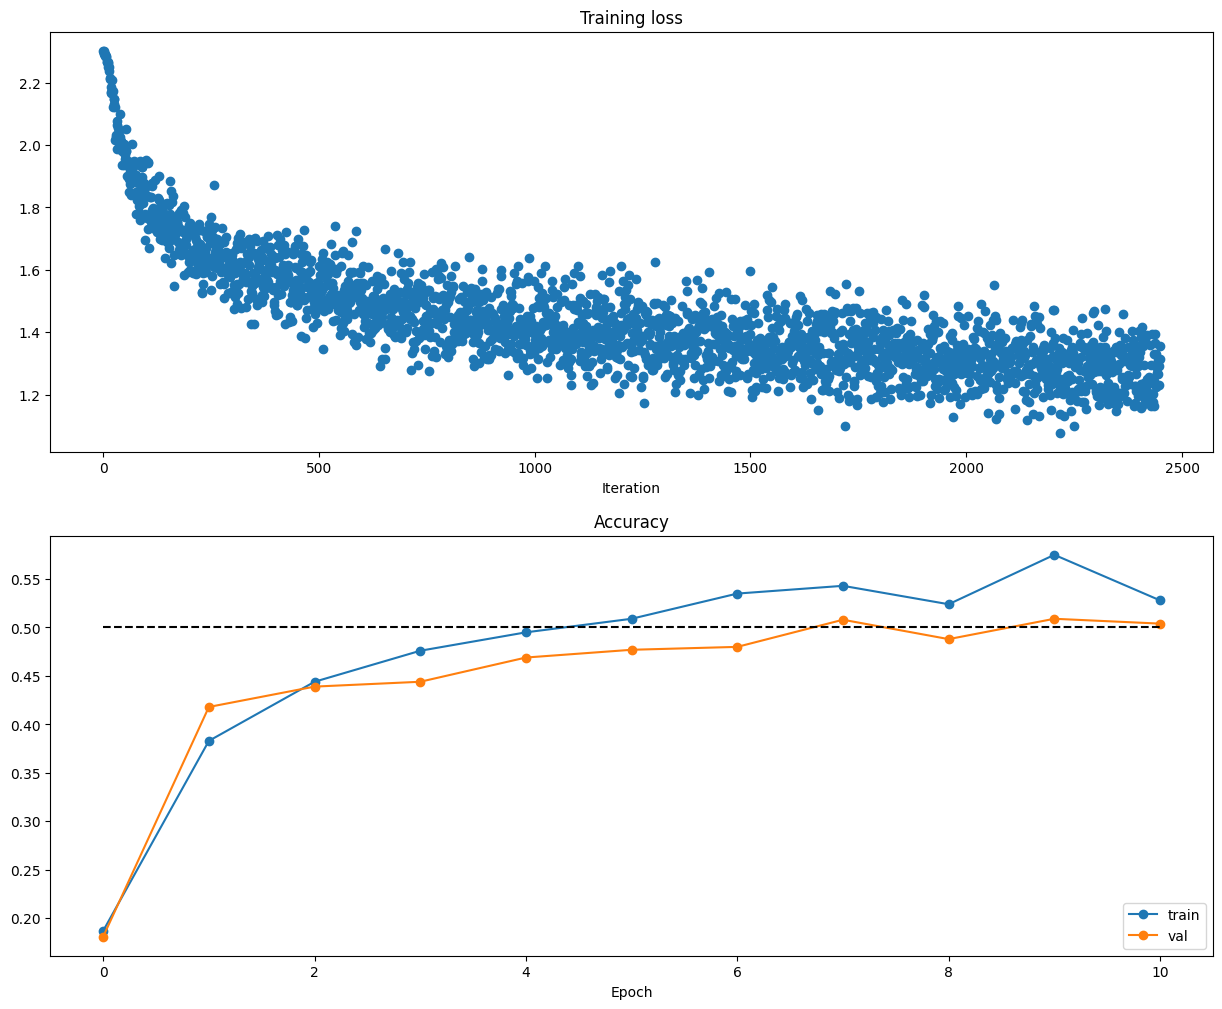

In [ ]:
# Run this cell to visualize training loss and train / val accuracy

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
plt.plot([0.5] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

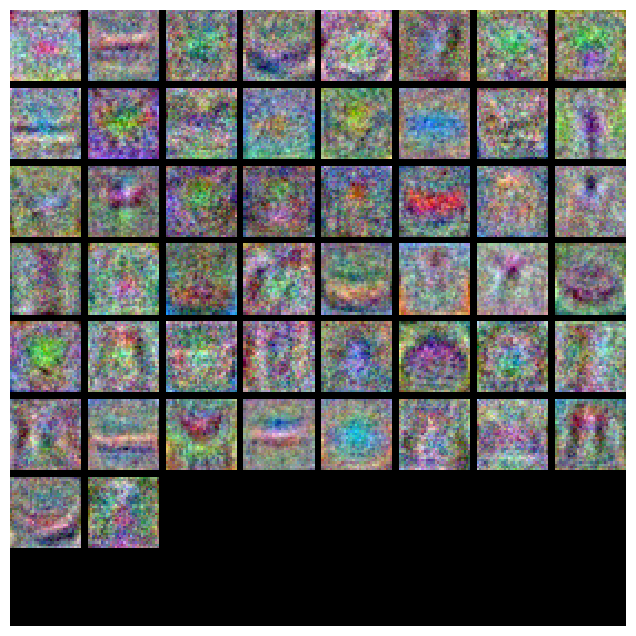

In [ ]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(3, 32, 32, -1).transpose(3, 1, 2, 0)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(model)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can (52% could serve as a reference), with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

Hyperparameter Tuning - Starting from 36% baseline
Strategy: Quick iterations with fewer epochs, then fine-tune best model

[Phase 1] Quick Exploration (5 epochs each)
--------------------------------------------------------------------------------

[1/6] Testing HS=100, LR=0.001, Reg=0.3
  Val Acc: 0.4760 (47.60%) <- NEW BEST!

[2/6] Testing HS=150, LR=0.001, Reg=0.3
  Val Acc: 0.4700 (47.00%)

[3/6] Testing HS=200, LR=0.001, Reg=0.2
  Val Acc: 0.4640 (46.40%)

[4/6] Testing HS=150, LR=0.002, Reg=0.3
  Val Acc: 0.4720 (47.20%)

[5/6] Testing HS=100, LR=0.002, Reg=0.5
  Val Acc: 0.4780 (47.80%) <- NEW BEST!

[6/6] Testing HS=200, LR=0.0015, Reg=0.25
  Val Acc: 0.4640 (46.40%)

[Phase 2] Medium Training on Top 3 Configurations (15 epochs)
--------------------------------------------------------------------------------

[1/3] HS=100, LR=0.002, Reg=0.5 (quick test: 0.4780)
  Val Acc after 15 epochs: 0.5330 (53.30%) <- NEW BEST!

[2/3] HS=100, LR=0.001, Reg=0.3 (quick test: 0.4760)
  Val A

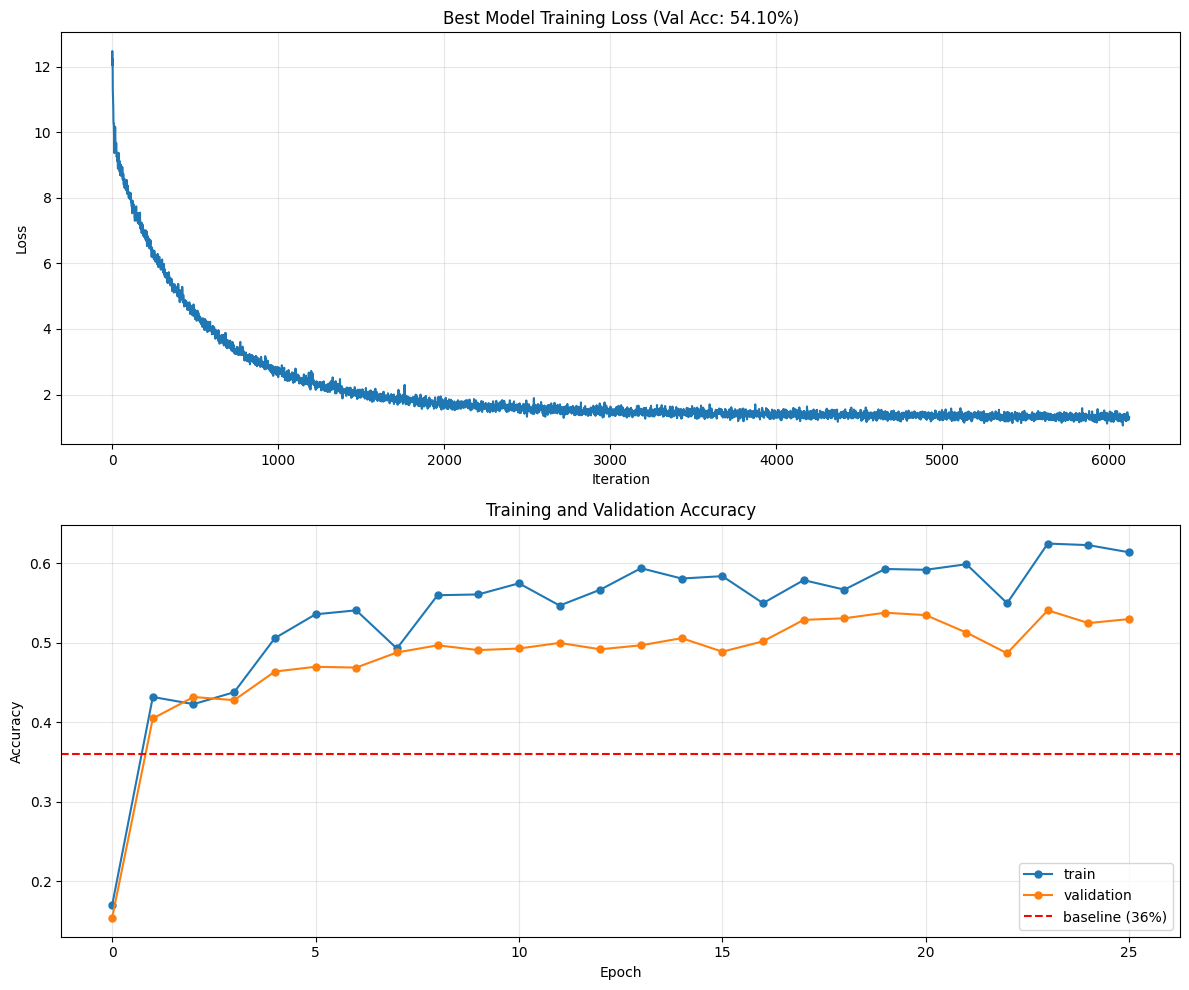

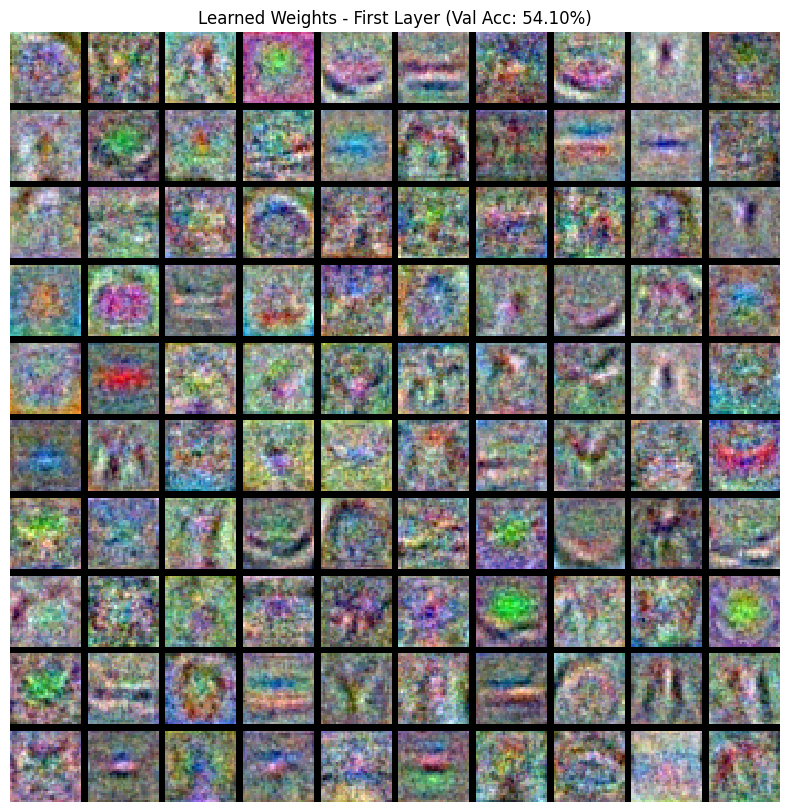


Training History (Last 10 epochs):
------------------------------------------------------------
Epoch     Train Acc      Val Acc        Status
------------------------------------------------------------
17        0.5500         0.5020         
18        0.5790         0.5290         
19        0.5670         0.5310         
20        0.5930         0.5380         
21        0.5920         0.5350         
22        0.5990         0.5130         
23        0.5500         0.4870         
24        0.6250         0.5410         ✓ Best
25        0.6230         0.5250         
26        0.6140         0.5300         


In [ ]:
best_model = None

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_model.                                                          #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################

import numpy as np

# 初始化
best_val_acc = 0.36  # 基于之前的基准
best_solver = None
results = {}

print("=" * 80)
print("Hyperparameter Tuning - Starting from 36% baseline")
print("Strategy: Quick iterations with fewer epochs, then fine-tune best model")
print("=" * 80)

# 阶段1: 快速探索 - 使用较少的epoch快速测试不同配置
print("\n[Phase 1] Quick Exploration (5 epochs each)")
print("-" * 80)

# 基于观察：学习率可能太低，模型容量不足
# 测试更大的hidden size和更高的learning rate
quick_configs = [
    # (hidden_size, learning_rate, reg)
    (100, 1e-3, 0.3),    # 增加hidden size
    (150, 1e-3, 0.3),    # 更大的hidden size
    (200, 1e-3, 0.2),    # 更大的hidden size，减少正则化
    (150, 2e-3, 0.3),    # 提高学习率
    (100, 2e-3, 0.5),    # 提高学习率，增加正则化
    (200, 1.5e-3, 0.25), # 折中方案
]

for idx, (hs, lr, reg) in enumerate(quick_configs):
    print(f"\n[{idx+1}/{len(quick_configs)}] Testing HS={hs}, LR={lr}, Reg={reg}")

    input_size = 32 * 32 * 3
    num_classes = 10
    model = TwoLayerNet(input_size, hs, num_classes,
                       weight_scale=1e-2, reg=reg)

    solver = Solver(model, data,
                   update_rule='sgd',
                   optim_config={'learning_rate': lr},
                   lr_decay=0.95,
                   num_epochs=5,  # 只训练5个epoch来快速测试
                   batch_size=200,
                   print_every=1000,
                   verbose=False)

    solver.train()

    val_acc = solver.best_val_acc
    results[(hs, lr, reg)] = val_acc

    print(f"  Val Acc: {val_acc:.4f} ({val_acc*100:.2f}%)", end="")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model = model
        best_solver = solver
        best_config = (hs, lr, reg)
        print(f" <- NEW BEST!")
    else:
        print()

# 阶段2: 基于最佳配置进行中等训练
print(f"\n{'='*80}")
print("[Phase 2] Medium Training on Top 3 Configurations (15 epochs)")
print("-" * 80)

# 选择top 3配置
top_configs = sorted(results.items(), key=lambda x: x[1], reverse=True)[:3]

for idx, (config, quick_acc) in enumerate(top_configs):
    hs, lr, reg = config
    print(f"\n[{idx+1}/3] HS={hs}, LR={lr}, Reg={reg} (quick test: {quick_acc:.4f})")

    input_size = 32 * 32 * 3
    num_classes = 10
    model = TwoLayerNet(input_size, hs, num_classes,
                       weight_scale=1e-2, reg=reg)

    solver = Solver(model, data,
                   update_rule='sgd',
                   optim_config={'learning_rate': lr},
                   lr_decay=0.95,
                   num_epochs=15,  # 中等训练时间
                   batch_size=200,
                   print_every=500,
                   verbose=False)

    solver.train()

    val_acc = solver.best_val_acc
    print(f"  Val Acc after 15 epochs: {val_acc:.4f} ({val_acc*100:.2f}%)", end="")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model = model
        best_solver = solver
        best_config = config
        print(f" <- NEW BEST!")
    else:
        print()

# 阶段3: 在最佳配置附近微调
print(f"\n{'='*80}")
print("[Phase 3] Fine-tuning Best Configuration")
print(f"Best so far: HS={best_config[0]}, LR={best_config[1]}, Reg={best_config[2]}")
print(f"Current best val acc: {best_val_acc:.4f} ({best_val_acc*100:.2f}%)")
print("-" * 80)

hs_best, lr_best, reg_best = best_config

# 微调策略：调整权重初始化和学习率
fine_tune_configs = [
    # 尝试不同的权重初始化
    (hs_best, lr_best, reg_best, 5e-3),   # 更大的初始化
    (hs_best, lr_best, reg_best, 2e-2),   # 更大的初始化
    # 尝试稍微不同的学习率
    (hs_best, lr_best * 0.8, reg_best * 0.8, 1e-2),
    (hs_best, lr_best * 1.2, reg_best * 1.2, 1e-2),
]

for idx, (hs, lr, reg, ws) in enumerate(fine_tune_configs):
    print(f"\n[{idx+1}/{len(fine_tune_configs)}] HS={hs}, LR={lr:.4f}, Reg={reg}, WS={ws}")

    input_size = 32 * 32 * 3
    num_classes = 10
    model = TwoLayerNet(input_size, hs, num_classes,
                       weight_scale=ws, reg=reg)

    solver = Solver(model, data,
                   update_rule='sgd',
                   optim_config={'learning_rate': lr},
                   lr_decay=0.95,
                   num_epochs=15,
                   batch_size=200,
                   print_every=500,
                   verbose=False)

    solver.train()

    val_acc = solver.best_val_acc
    print(f"  Val Acc: {val_acc:.4f} ({val_acc*100:.2f}%)", end="")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model = model
        best_solver = solver
        best_config = (hs, lr, reg)
        print(f" <- NEW BEST!")
    else:
        print()

# 阶段4: 最终训练 - 使用最佳配置进行完整训练
print(f"\n{'='*80}")
print("[Phase 4] Final Extended Training with Best Configuration")
print("-" * 80)

hs, lr, reg = best_config[:3]
print(f"Final config: HS={hs}, LR={lr}, Reg={reg}")

input_size = 32 * 32 * 3
num_classes = 10
final_model = TwoLayerNet(input_size, hs, num_classes,
                         weight_scale=1e-2, reg=reg)

final_solver = Solver(final_model, data,
                     update_rule='sgd',
                     optim_config={'learning_rate': lr},
                     lr_decay=0.95,
                     num_epochs=25,  # 完整训练
                     batch_size=200,
                     print_every=100,
                     verbose=True)

print("\nTraining final model...")
final_solver.train()

if final_solver.best_val_acc > best_val_acc:
    best_val_acc = final_solver.best_val_acc
    best_model = final_model
    best_solver = final_solver

# 总结
print(f"\n{'='*80}")
print("HYPERPARAMETER TUNING COMPLETED")
print(f"{'='*80}")
print(f"Starting baseline: 36.00%")
print(f"Final best validation accuracy: {best_val_acc:.4f} ({best_val_acc*100:.2f}%)")
print(f"Improvement: +{(best_val_acc - 0.36)*100:.2f}%")
print(f"{'='*80}")

# 可视化最佳模型
if best_solver is not None:
    fig, axes = plt.subplots(2, 1, figsize=(12, 10))

    # 训练损失
    axes[0].plot(best_solver.loss_history)
    axes[0].set_title(f'Best Model Training Loss (Val Acc: {best_val_acc:.2%})')
    axes[0].set_xlabel('Iteration')
    axes[0].set_ylabel('Loss')
    axes[0].grid(True, alpha=0.3)

    # 准确率
    axes[1].plot(best_solver.train_acc_history, '-o', label='train', markersize=5)
    axes[1].plot(best_solver.val_acc_history, '-o', label='validation', markersize=5)
    axes[1].axhline(y=0.36, color='r', linestyle='--', label='baseline (36%)')
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend(loc='lower right')
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # 可视化学到的权重
    from cs231n.vis_utils import visualize_grid

    W1 = best_model.params['W1']
    W1 = W1.reshape(3, 32, 32, -1).transpose(3, 1, 2, 0)
    plt.figure(figsize=(10, 10))
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.title(f'Learned Weights - First Layer (Val Acc: {best_val_acc:.2%})')
    plt.show()

    # 打印详细的训练历史
    print("\nTraining History (Last 10 epochs):")
    print("-" * 60)
    print(f"{'Epoch':<10}{'Train Acc':<15}{'Val Acc':<15}{'Status'}")
    print("-" * 60)
    for i in range(max(0, len(best_solver.val_acc_history)-10), len(best_solver.val_acc_history)):
        train_acc = best_solver.train_acc_history[i]
        val_acc = best_solver.val_acc_history[i]
        status = "✓ Best" if abs(val_acc - best_val_acc) < 1e-6 else ""
        print(f"{i+1:<10}{train_acc:<15.4f}{val_acc:<15.4f}{status}")

################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Test your model!
Run your best model on the validation and test sets. You should achieve above 48% accuracy on the validation set and the test set.

In [ ]:
y_val_pred = np.argmax(best_model.loss(data['X_val']), axis=1)
print('Validation set accuracy: ', (y_val_pred == data['y_val']).mean())

Validation set accuracy:  0.541


In [ ]:
y_test_pred = np.argmax(best_model.loss(data['X_test']), axis=1)
print('Test set accuracy: ', (y_test_pred == data['y_test']).mean())

Test set accuracy:  0.537


In [ ]:
# Save best model
best_model.save("best_two_layer_net.npy")

NameError: name '__file__' is not defined

## Inline Question 2:

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

$\color{blue}{\textit Your Answer:}$

$\color{blue}{\textit Your Explanation:}$

